# Dataset Description
The Titanic dataset contains information about passengers who were on board the Titanic when it sank on April 15, 1912. The variables in the dataset include:

1. PassengerId: a unique identifier for each passenger
2. Survived: a binary variable indicating whether a passenger survived (1) or not (0)
3. Pclass: the passenger class (1 = first class, 2 = second class, 3 = third class)
4. Name: the name of the passenger
5. Sex: the gender of the passenger (male or female)
6. Age: the age of the passenger
7. SibSp: the number of siblings/spouses aboard the Titanic for the passenger
8. Parch: the number of parents/children aboard the Titanic for the passenger
9. Ticket: the ticket number for the passenger
10. Fare: the fare paid by the passenger
11. Cabin: the cabin number for the passenger
12. Embarked: the port of embarkation for the passenger (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('train.csv', index_col='PassengerId' ) 
df_test = pd.read_csv('test.csv', index_col='PassengerId') 

In [3]:
print(df.shape)
print(df_test.shape)

(891, 11)
(418, 10)


In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Observation: 
- we have 5 categorical futures (Name, Sex, Ticket, Cabin, Embarked)
- (Cabin, Ticket, PassengerId) are unwanted columns 

In [7]:
# missing values 
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Observation: 
- drop "Cabin" column as there are many nulls
- drop "Embarked" 2 rows
- Deal with age Missing values

In [8]:
df.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
df_test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

## Categorical Data:

### Name

In [9]:
df[['Name']].head()

,Name
PassengerId,
1,"Braund, Mr. Owen Harris"
2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
3,"Heikkinen, Miss. Laina"
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
5,"Allen, Mr. William Henry"


we need to extract Titles from Names 

In [10]:
pattern = '\s(\w+)\.'
df['Title'] = df['Name'].str.extract(
                    pattern, 
                    expand=False)

df_test['Title'] = df_test['Name'].str.extract(
                    pattern, 
                    expand=False)

print(df['Title'].value_counts())
print('-------------------------')
print(df_test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
-------------------------
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [11]:
df.drop([ 'Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

In [12]:
# Change Title of low frequencies with "other"

m = df['Title'].map(df['Title'].value_counts(normalize=True).lt(0.005))
others =list(df[m].Title ) 


df.Title[df['Title'].isin(others)] = 'other'
df_test.Title[df_test['Title'].isin(others)] = 'other'

C:\Users\Andrew\AppData\Local\Temp/ipykernel_20940/800893735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Title[df['Title'].isin(others)] = 'other'
C:\Users\Andrew\AppData\Local\Temp/ipykernel_20940/800893735.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.Title[df_test['Title'].isin(others)] = 'other'


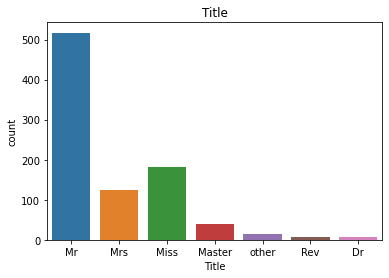

In [13]:
plt.figure()
sns.countplot(data=df,x='Title')
plt.title('Title')
plt.show()

### Sex

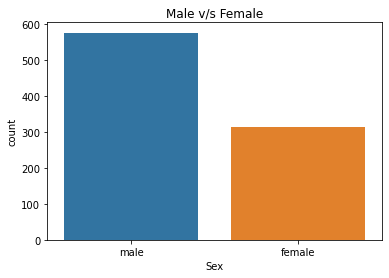

In [14]:
plt.figure()
sns.countplot(data=df,x='Sex')
plt.title('Male v/s Female')
plt.show()

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Embarked

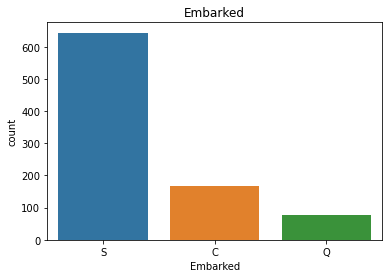

In [16]:
plt.figure()
sns.countplot(data=df,x='Embarked')
plt.title('Embarked')
plt.show()

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.9+ KB


In [19]:
# OneHotEncoding
cat_cols = ['Title', 'Sex', 'Embarked']
train = pd.get_dummies(df[cat_cols])  
test = pd.get_dummies(df_test[cat_cols])    
OH_cols_train, OH_cols_test = train.align(test, join='inner', axis=1)  # inner join


# Add one-hot encoded columns to numerical features
df = pd.concat([df, OH_cols_train], axis=1)
df_test = pd.concat([df_test, OH_cols_test], axis=1)

In [20]:
print(df.shape)
print('-------------------------')
print(df_test.shape)

(891, 21)
-------------------------
(418, 20)


In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_Dr,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,0,...,0,1,0,0,0,0,1,0,0,1
2,1,1,female,38.0,1,0,71.2833,C,Mrs,0,...,0,0,1,0,0,1,0,1,0,0
3,1,3,female,26.0,0,0,7.9250,S,Miss,0,...,1,0,0,0,0,1,0,0,0,1
4,1,1,female,35.0,1,0,53.1000,S,Mrs,0,...,0,0,1,0,0,1,0,0,0,1
5,0,3,male,35.0,0,0,8.0500,S,Mr,0,...,0,1,0,0,0,0,1,0,0,1


## Split Data:
(Before filling missing values and removing the outliers)

In [22]:
# Remove rows with missing target, separate target from predictors
df.dropna(axis=0, subset=['Survived'], inplace=True)
y = df.Survived              
x = df.drop(['Survived'], axis=1)

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(x, y, test_size=0.3, random_state=0 , stratify=y)

In [24]:
df_train = pd.concat([X_t, y_t], axis=1)
df_val = pd.concat([X_v, y_v], axis=1)

print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(891, 21)
(623, 21)
(268, 21)
(418, 20)


## Numerical Data:

In [25]:
# missing values 
df_train.isna().sum()

Pclass            0
Sex               0
Age             127
SibSp             0
Parch             0
Fare              0
Embarked          2
Title             0
Title_Dr          0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rev         0
Title_other       0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Survived          0
dtype: int64

## Age

In [26]:
print(df_train.Age.isna().sum())
print(df_val.Age.isna().sum())
print(df_test.Age.isna().sum())

127
50
86


In [27]:
# Replace missing ages with title avrage age

A_Dict = df_train.groupby('Title').Age.agg(np.mean).to_dict()

df_train.Age = np.where(df_train.Age.isnull(), df_train['Title'].map(A_Dict), df_train.Age)
df_val.Age = np.where(df_val.Age.isnull(), df_val['Title'].map(A_Dict), df_val.Age)
df_test.Age = np.where(df_test.Age.isnull(), df_test['Title'].map(A_Dict), df_test.Age)

print(df_train.Age.isna().sum())
print(df_val.Age.isna().sum())
print(df_test.Age.isna().sum())

0
0
0


<AxesSubplot:>

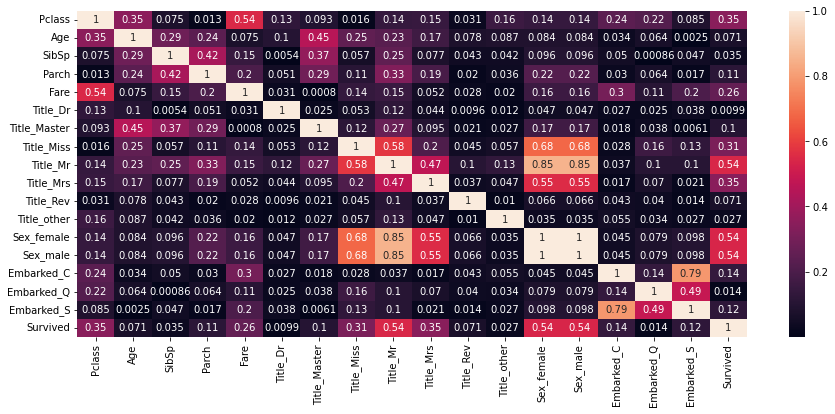

In [28]:
plt.figure(figsize=(15,6))
sns.heatmap(np.abs(df_train.corr()), annot=True)

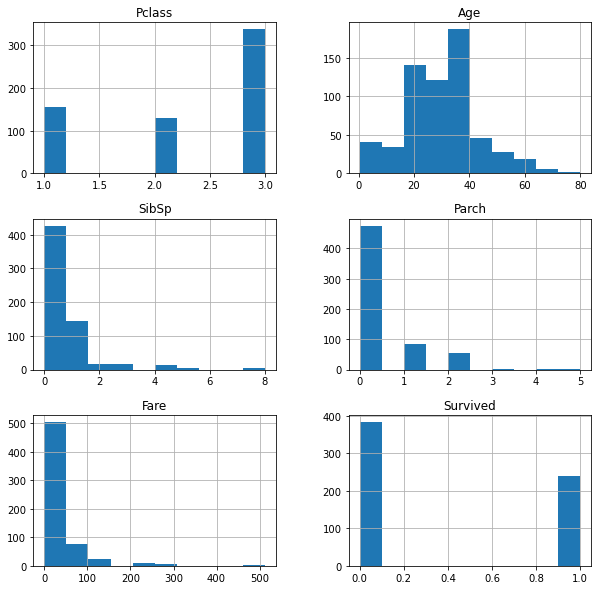

In [29]:
df_train[['Pclass','Age','SibSp','Parch','Fare','Survived']].hist(figsize=(10,10));

C:\Users\Andrew\AppData\Local\Temp/ipykernel_20940/380511336.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_train = df_train[~ ((df_train < (Q1 - 1.5 * IQR)) \
C:\Users\Andrew\AppData\Local\Temp/ipykernel_20940/380511336.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\Andrew\AppData\Local\Temp/ipykernel_20940/380511336.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_val = df_val[~ ((df_val < (Q1 - 1.5

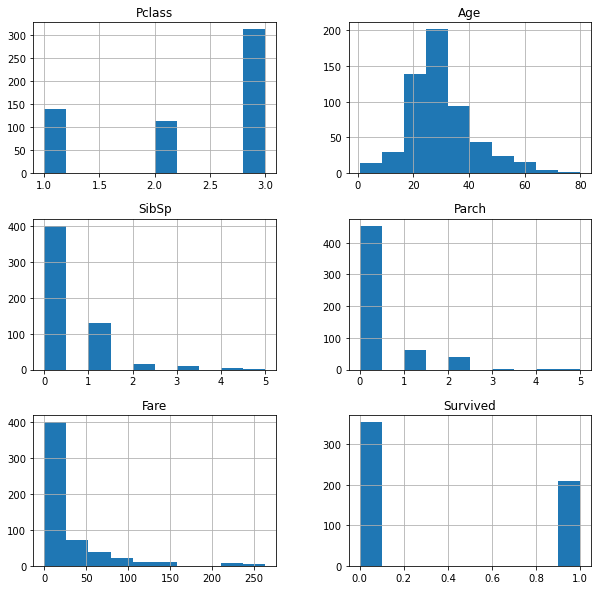

In [30]:
# Remove outliers: 
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

df_train = df_train[~ ((df_train < (Q1 - 1.5 * IQR)) \
                                     | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]

df_val = df_val[~ ((df_val < (Q1 - 1.5 * IQR)) \
                                     | (df_val > (Q3 + 1.5 * IQR))).any(axis=1)]

df_train[['Pclass','Age','SibSp','Parch','Fare','Survived']].hist(figsize=(10,10));

In [31]:
print(df_train.shape)
print('-------------------------')
print(df_val.shape)
print('-------------------------')
print(df_test.shape)

(565, 21)
-------------------------
(249, 21)
-------------------------
(418, 20)


In [32]:
# drop cat_cols 
df_train.drop(cat_cols, axis=1, inplace=True)
df_val.drop(cat_cols, axis=1, inplace=True)
df_test.drop(cat_cols, axis=1, inplace=True)
x.drop(cat_cols, axis=1, inplace=True)

df_train.head()

,Pclass,Age,SibSp,Parch,Fare,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_other,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,,,,,,,,,
232,3,29.000000,0,0,7.7750,0,0,0,1,0,0,0,0,1,0,0,1,0
837,3,21.000000,0,0,8.6625,0,0,0,1,0,0,0,0,1,0,0,1,0
640,3,32.259259,1,0,16.1000,0,0,0,1,0,0,0,0,1,0,0,1,0
390,2,17.000000,0,0,12.0000,0,0,1,0,0,0,0,1,0,1,0,0,1
598,3,49.000000,0,0,0.0000,0,0,0,1,0,0,0,0,1,0,0,1,0


In [33]:
# x,y split

X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train.Survived  
X_val = df_val.drop(['Survived'], axis=1)
y_val = df_val.Survived  



## Models:

In [34]:
# LogisticRegression model 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)

y_predect_train = LR.predict(X_train)
y_predect_test  = LR.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       355
           1       0.78      0.73      0.75       210

    accuracy                           0.82       565
   macro avg       0.81      0.80      0.81       565
weighted avg       0.82      0.82      0.82       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.87       155
           1       0.84      0.70      0.76        94

    accuracy                           0.84       249
   macro avg       0.84      0.81      0.82       249
weighted avg       0.84      0.84      0.83       249



D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# AdaBoostClassifier model 
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier(random_state=0)
AB.fit(X_train, y_train)

y_predect_train = AB.predict(X_train)
y_predect_test  = AB.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       355
           1       0.79      0.77      0.78       210

    accuracy                           0.84       565
   macro avg       0.83      0.83      0.83       565
weighted avg       0.84      0.84      0.84       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       155
           1       0.79      0.68      0.73        94

    accuracy                           0.81       249
   macro avg       0.81      0.79      0.79       249
weighted avg       0.81      0.81      0.81       249



In [36]:
# DecisionTree model 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_predect_train = dt.predict(X_train)
y_predect_test  = dt.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       355
           1       1.00      0.97      0.98       210

    accuracy                           0.99       565
   macro avg       0.99      0.98      0.98       565
weighted avg       0.99      0.99      0.99       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       155
           1       0.72      0.70      0.71        94

    accuracy                           0.78       249
   macro avg       0.77      0.77      0.77       249
weighted avg       0.78      0.78      0.78       249



In [37]:
# RandomForest model 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

y_predect_train = RF.predict(X_train)
y_predect_test  = RF.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       355
           1       0.99      0.97      0.98       210

    accuracy                           0.99       565
   macro avg       0.99      0.98      0.98       565
weighted avg       0.99      0.99      0.99       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       155
           1       0.80      0.69      0.74        94

    accuracy                           0.82       249
   macro avg       0.81      0.79      0.80       249
weighted avg       0.82      0.82      0.82       249



## Feature importances:

<AxesSubplot:>

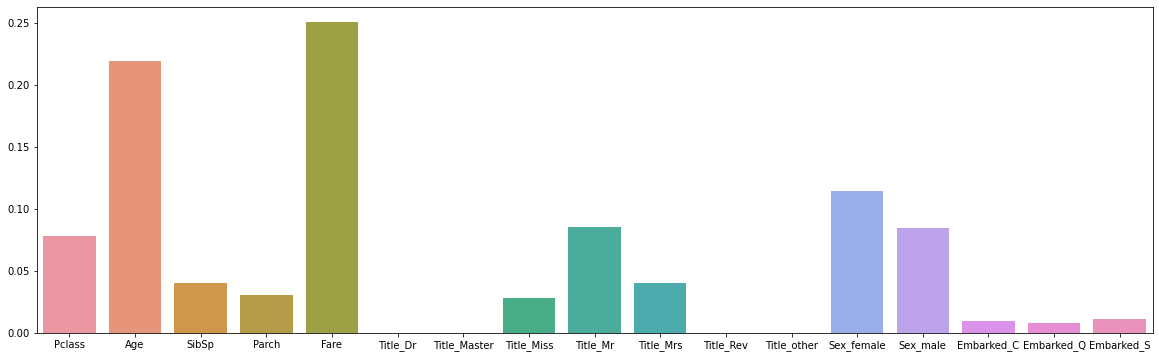

In [38]:
importance = RF.feature_importances_
plt.figure(figsize=(20,6))

sns.barplot(x=x.columns, y=importance)

# Function to select best parameters for a machine learning model

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestClassifier(n_estimators=n_estimators, random_state=0))
    ])
    
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')

    print("Average MAE score:", scores.mean())
    return scores.mean()

In [40]:
# Test different parameter values
results = {}
for i in range(8):
    results[(i+1)*50] =get_score((i+1)*50)

Average MAE score: 0.20708094112349432
Average MAE score: 0.20528912904799432
Average MAE score: 0.20706217869338436
Average MAE score: 0.20529851026304927
Average MAE score: 0.2088446095538294
Average MAE score: 0.2106176591992195
Average MAE score: 0.21238132762955456
Average MAE score: 0.21414499605988968


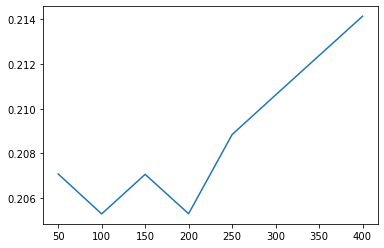

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

 the best parameter value is 100

In [45]:
# New RandomForest model 
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators= 100,random_state=0)
RF.fit(X_train, y_train)

y_predect_train = RF.predict(X_train)
y_predect_test  = RF.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       355
           1       0.99      0.97      0.98       210

    accuracy                           0.99       565
   macro avg       0.99      0.98      0.98       565
weighted avg       0.99      0.99      0.99       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       155
           1       0.80      0.69      0.74        94

    accuracy                           0.82       249
   macro avg       0.81      0.79      0.80       249
weighted avg       0.82      0.82      0.82       249



#### LogisticRegression still has the best accuracy (0.84)

# Generate a submission

In [43]:
# Apply the model to all the data we have before submition
X_all = pd.concat([X_train,X_val])
y_all =  pd.concat([y_train,y_val])


# LogisticRegression model 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_all, y_all)

y_predect_train = LR.predict(X_train)
y_predect_test  = LR.predict(X_val)

# Model Score 
from sklearn.metrics import classification_report

print("Train Report:")
print(classification_report(y_train, y_predect_train))
print("__________________________________________________________")
print("Test Report:")
print(classification_report(y_val, y_predect_test))

Train Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       355
           1       0.77      0.74      0.75       210

    accuracy                           0.82       565
   macro avg       0.81      0.80      0.81       565
weighted avg       0.82      0.82      0.82       565

__________________________________________________________
Test Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       155
           1       0.84      0.73      0.78        94

    accuracy                           0.85       249
   macro avg       0.85      0.83      0.83       249
weighted avg       0.85      0.85      0.85       249



D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
df_test=df_test.fillna(method ='ffill')
test_preds = LR.predict(df_test)
test= df_test.reset_index()

# Run the code to save predictions in the format used for competition scoring
output = pd.DataFrame({'PassengerId': test.PassengerId,
                       'Survived': test_preds})
output.to_csv('submission.csv', index=False)



### kaggle Score: 0.78229